<a href="https://colab.research.google.com/github/virtuel75/avila-analysis/blob/main/notebook/avila_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recuperation des données

In [1]:
!pip install wget

In [2]:
from os import path
import wget

In [3]:
data_file = 'avila.zip'

## Téléchargement des données

In [4]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip'

if not path.exists(data_file):
  wget.download(url=data_url, out=data_file)

## Extraction des données

In [5]:
from zipfile import ZipFile

In [6]:
with ZipFile(data_file, 'r') as zip_ref:
    zip_ref.extractall()

# Lecture

In [7]:
import pandas as pd

In [8]:
# train file
avila_tr_filename = './avila/avila-tr.txt'

# test file
avila_ts_filename = './avila/avila-ts.txt'

In [9]:
data_tr = pd.read_csv(avila_tr_filename, '\n', ',', header=None)
data_ts = pd.read_csv(avila_ts_filename, '\n', ',', header=None)

In [10]:
data_tr.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
1384,-0.054866,-0.330495,-3.210528,-0.267456,0.261718,1.353010,0.635431,-0.572192,-0.466001,0.958950,F
2335,-0.301743,0.352558,0.288973,1.638181,0.261718,1.228436,0.446679,0.695634,0.843621,0.989691,E
9748,0.154980,-0.040001,0.363657,1.200934,0.261718,-0.266459,0.559930,1.361893,0.438262,-0.418541,A
5745,0.105604,0.556689,-0.031104,0.619301,0.172340,-0.764757,0.182426,0.173961,-0.621908,-0.664912,A
4491,-0.067210,0.462474,0.104040,0.463129,0.261718,0.273364,0.371178,0.592247,-0.029461,0.163733,F


In [11]:
data_ts.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
6065,0.031541,0.203385,0.086258,0.045008,0.172340,-0.681707,0.106925,0.741998,0.313536,-0.553981,F
9961,0.179667,-0.330495,0.530808,-0.314183,0.082961,-0.515608,0.069175,-1.204824,-1.120812,-0.396746,A
5125,0.327793,-2.426761,-2.324983,-1.744082,0.440474,0.480988,0.144676,1.621807,0.937165,0.477493,A
3107,0.043885,0.007106,1.348781,-1.249397,-0.185173,0.730137,-0.044076,1.512421,0.937165,0.827392,E
5829,0.167323,0.148427,0.278304,-0.289596,0.261718,0.480988,0.106925,-0.502549,0.219991,0.549811,H


# Pré-traitement

## Test de chauvechement

In [12]:
# on vérifie d'abord que les données d'entrainement et les données
# ont la même structure
len(data_tr.columns) == len(data_ts.columns)

True

In [13]:
# on vérifie que les données d'entrainement et les données
# ne se chevauche pas
len(data_tr.merge(data_ts, how = 'inner' ,indicator=False)) > 0

False

## Renommage des colonnes

In [14]:
columns = [f'f{i}' for i in range(10)] + ['class']

data_tr.columns = columns
data_ts.columns = columns

## Vérification des types d'attributs

In [15]:
data_tr.dtypes

f0       float64
f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
f9       float64
class     object
dtype: object

In [16]:
data_ts.dtypes

f0       float64
f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
f9       float64
class     object
dtype: object

Remplacement du type de l'attribut **class** par le type `category`

In [17]:
data_tr['class'] = data_tr['class'].astype('category')
data_ts['class'] = data_ts['class'].astype('category')

In [18]:
data_tr.dtypes

f0        float64
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
class    category
dtype: object

In [19]:
data_ts.dtypes

f0        float64
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
class    category
dtype: object

## Vérification de présence de valeurs manquante

In [20]:
data_all = pd.concat([data_tr, data_ts])

In [21]:
data_all.iloc[:, :10].isnull().any()

f0    False
f1    False
f2    False
f3    False
f4    False
f5    False
f6    False
f7    False
f8    False
f9    False
dtype: bool

In [22]:
data_all.iloc[:, :10].isna().any()

f0    False
f1    False
f2    False
f3    False
f4    False
f5    False
f6    False
f7    False
f8    False
f9    False
dtype: bool

# Analyse

In [23]:
!pip install seaborn

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## Description des attributs

In [25]:
n_attributes = len(data_tr.columns)
print(f'Number of attributes: {n_attributes}')

Number of attributes: 11


* `f1` :       intercolumnar distance
* `f2` :       upper margin 
* `f3` :       lower margin 
* `f4` :       exploitation 
* `f5` :       row number 
* `f6` :       modular ratio 
* `f7` :       interlinear spacing 
* `f8` :       weight 
* `f9` :       peak number 
* `f10` :      modular ratio/ interlinear spacing
* `class` :
  - A
  - B
  - C
  - D
  - E
  - F
  - G
  - I
  - W
  - X
  - Y

In [26]:
target_attribute = 'class'

## Etude des classes

In [27]:
n_target_type = data_all[target_attribute].nunique()

On vérifie que les données d'entrainement comporte bien toutes les type de classes

In [28]:
data_tr[target_attribute].nunique() == n_target_type

True

Nombre de type de classe

In [29]:
print(f'Nombre de type de classe : {n_target_type}')

Nombre de type de classe : 12


Distribution de l'ensemble des données par classe

In [30]:
n_sample_per_target_type = data_all.groupby(target_attribute).size().reset_index()
n_sample_per_target_type.columns = [target_attribute, 'count']
n_sample_per_target_type

,class,count
0,A,8572
1,B,10
2,C,206
3,D,705
4,E,2190
5,F,3923
6,G,893
7,H,1039
8,I,1663
9,W,89


## Résumé statistique

In [31]:
data_all.describe().loc[['mean', 'std', 'min', 'max']]

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


## Correlation des attributs

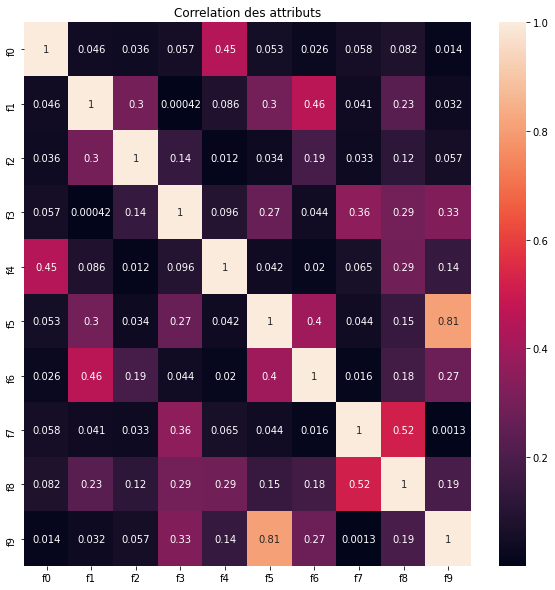

In [32]:
attributes_correlation = data_all.corr().abs()

plt.figure(figsize=(10, 10))
sns.heatmap(attributes_correlation, annot=True)
plt.title('Correlation des attributs')
plt.show()

# Entrainement des modeles

In [33]:
!pip install scikit-learn

In [34]:
import numpy as np
from sklearn import metrics

In [35]:
def test_model(model, train, test, target_attribute):
  # train
  X_train = train.loc[:, train.columns != target_attribute] # train input
  y_train = train[target_attribute]                         # train target

  # test
  X_test = test.loc[:, test.columns != target_attribute]    # test input
  y_test = test[target_attribute]                           # test target

  model.fit(X_train, y_train)

  predictions = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, predictions)

  return accuracy, predictions

In [36]:
def test_model_multi(model, train_test, target_attribute):
  accuracies = []
  predictions = []

  for train, test in train_test:
    accuracy, pred = test_model(model, train, test, target_attribute)
    accuracies.append(accuracy)
    predictions.append(pred)

  return accuracies, predictions

## Données d'entrainement

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
max_train_test = 20

train_test = []

while len(train_test) < max_train_test:
  train, test = train_test_split(data_tr, test_size=0.25)

  if train[target_attribute].nunique() == data_all[target_attribute].nunique():
    train_test.append((train, test))

## K-NN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

### Recherche du meilleur K

In [40]:
from math import sqrt

In [41]:
max_k = 20
p_value = 1

knn_result = []

# test k values
for k in range(1, max_k):
  knn_k_model = KNeighborsClassifier(n_neighbors=k, p=p_value)
  train, test = train_test[0]
  accuracy, _ = test_model(knn_k_model, train, test, target_attribute)

  knn_result.append((k, accuracy))

In [42]:
k_values = [i for i in range(1, max_k)]
k_accuracies = [accuracy for _, accuracy in knn_result]

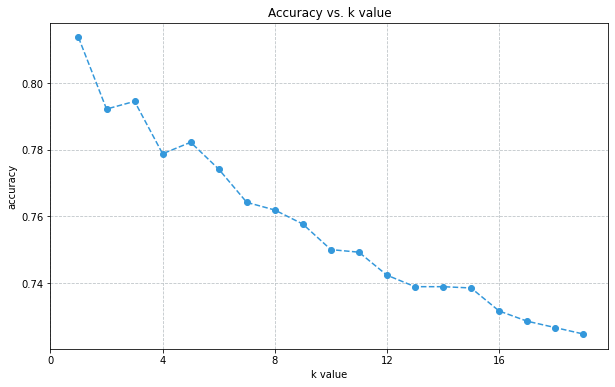

In [43]:
plt.figure(figsize=(10,6))
plt.plot(k_values, k_accuracies, linestyle='dashed', marker='o', color='#3498db')
plt.xticks(np.arange(0, len(k_values) + 1, 4.0))
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('Accuracy vs. k value')
plt.grid(b=True, which='major', color='#bdc3c7', linestyle='--')
plt.show()

In [44]:
best_k_accuracy = max(k_accuracies)
best_k = k_accuracies.index(best_k_accuracy) + 1

print(f'Meilleur valeur pour k: {best_k}')
print(f'Precision: {best_k_accuracy}')

Meilleur valeur pour k: 1
Precision: 0.8136503067484663


### Définition du model

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=best_k, p=p_value)

In [46]:
knn_accuracy, knn_predictions = test_model_multi(knn_model, train_test, target_attribute)

In [47]:
knn_accuracy_mean = sum(knn_accuracy) / len(knn_accuracy)
knn_accuracy_min = min(knn_accuracy)
knn_accuracy_max = max(knn_accuracy)

In [48]:
print(f'precision moy.: {round(knn_accuracy_mean, 6)}') 
print(f'precision min.: {round(knn_accuracy_min, 6)}')
print(f'precision max.: {round(knn_accuracy_max, 6)}')

precision moy.: 0.816162
precision min.: 0.80138
precision max.: 0.827837


## Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

### Définition du model

In [50]:
lr_model = LogisticRegression(multi_class='multinomial', max_iter=500)

In [51]:
lr_accuracy, lr_predictions = test_model_multi(lr_model, train_test, target_attribute)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
lr_accuracy_mean = sum(lr_accuracy) / len(lr_accuracy)
lr_accuracy_min = min(lr_accuracy)
lr_accuracy_max = max(lr_accuracy)

In [53]:
print(f'precision moy.: {round(lr_accuracy_mean, 6)}') 
print(f'precision min.: {round(lr_accuracy_min, 6)}')
print(f'precision max.: {round(lr_accuracy_max, 6)}')

precision moy.: 0.565088
precision min.: 0.54908
precision max.: 0.592791


## Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC

### Définition du model

In [55]:
svm_model = SVC()

In [56]:
svm_accuracy, svm_predictions = test_model_multi(svm_model, train_test, target_attribute)

In [57]:
svm_accuracy_mean = sum(svm_accuracy) / len(svm_accuracy)
svm_accuracy_min = min(svm_accuracy)
svm_accuracy_max = max(svm_accuracy)

In [58]:
print(f'precision moy.: {round(svm_accuracy_mean, 6)}') 
print(f'precision min.: {round(svm_accuracy_min, 6)}')
print(f'precision max.: {round(svm_accuracy_max, 6)}')

precision moy.: 0.675153
precision min.: 0.642255
precision max.: 0.715874


## Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

### Définition du model

In [60]:
rf_model = RandomForestClassifier()

In [61]:
rf_accuracy, rf_predictions = test_model_multi(rf_model, train_test, target_attribute)

In [62]:
rf_accuracy_mean = sum(rf_accuracy) / len(rf_accuracy)
rf_accuracy_min = min(rf_accuracy)
rf_accuracy_max = max(rf_accuracy)

In [63]:
print(f'precision moy.: {round(rf_accuracy_mean, 6)}') 
print(f'precision min.: {round(rf_accuracy_min, 6)}')
print(f'precision max.: {round(rf_accuracy_max, 6)}')

precision moy.: 0.977186
precision min.: 0.972009
precision max.: 0.983896


## Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

### Définition du model

In [65]:
dt_model = DecisionTreeClassifier()

In [66]:
dt_accuracy, dt_predictions = test_model_multi(dt_model, train_test, target_attribute)

In [67]:
dt_accuracy_mean = sum(dt_accuracy) / len(dt_accuracy)
dt_accuracy_min = min(dt_accuracy)
dt_accuracy_max = max(dt_accuracy)

In [68]:
print(f'precision moy.: {round(dt_accuracy_mean, 6)}')
print(f'precision min.: {round(dt_accuracy_min, 6)}')
print(f'precision max.: {round(dt_accuracy_max, 6)}')

precision moy.: 0.958167
precision min.: 0.927914
precision max.: 0.975844


## Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

### Définition du model

In [70]:
nb_model = GaussianNB()

In [71]:
nb_accuracy, nb_predictions = test_model_multi(nb_model, train_test, target_attribute)

In [72]:
nb_accuracy_mean = sum(nb_accuracy) / len(nb_accuracy)
nb_accuracy_min = min(nb_accuracy)
nb_accuracy_max = max(nb_accuracy)

In [73]:
print(f'precision moy.: {round(nb_accuracy_mean, 6)}')
print(f'precision min.: {round(nb_accuracy_min, 6)}')
print(f'precision max.: {round(nb_accuracy_max, 6)}')

precision moy.: 0.305426
precision min.: 0.270322
precision max.: 0.345475


# Evaluation des modeles

## Enumération des modeles

In [74]:
model_enum = {
    'knn' : (knn_model, 'K-NN'),
    'lr'  : (lr_model, 'Logstic Regression'),
    'svm' : (svm_model, 'SVM'),
    'rf'  : (rf_model, 'Random Forest'),
    'dt'  : (dt_model, 'Decision Tree'),
    'nb'  : (nb_model, 'Naive Bayes')
}

## Test des modeles

In [75]:
model_result = {}

for model_name in model_enum:
  model, _ = model_enum.get(model_name)
  accuracy, _ = test_model(model, data_tr, data_ts, target_attribute)

  model_result[model_name] = accuracy

## Récupération du meilleure modele

In [76]:
best_result = None

for key in model_result.keys():
  accuracy = model_result[key]

  _, model_name = model_enum.get(key)

  if best_result is None:
    best_result = (key, model_name, accuracy)
  else:
    if best_result[2] < accuracy:
      best_result = (key, model_name, accuracy)

  name = model_name.ljust(18, ' ')

  print(f'{key}\t', f'{name}\t', f'accuracy: {round(accuracy, 6)}')

knn	 K-NN              	 accuracy: 0.840663
lr	 Logstic Regression	 accuracy: 0.561368
svm	 SVM               	 accuracy: 0.674523
rf	 Random Forest     	 accuracy: 0.984862
dt	 Decision Tree     	 accuracy: 0.970969
nb	 Naive Bayes       	 accuracy: 0.293284


In [77]:
best_model_name = best_result[0]

print(f'Best model: {best_model_name}')

best_model, _ = model_enum.get(best_model_name)

Best model: rf


# Enregistrement du meilleure modele

In [78]:
import joblib

In [79]:
model_filename = 'model.sav'

joblib.dump(best_model, model_filename)

['model.sav']

# Chargement de modele

In [80]:
loaded_model = joblib.load(model_filename)

In [81]:
# resultat attendu : A
x = [[0.31545, -0.236281, 0.37077, 0.812174, 0.261718, 0.14879, 0.408929, 0.690469, -0.123005, 0.029367]]

prediction = loaded_model.predict(x)[0]
print(f'Classe prédit: {prediction}')

Classe prédit: A
